In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF

In [2]:
import txt_mixin

In [3]:
plt.rcParams['font.size'] = 14

In [4]:
import py_block_diagram

In [5]:
import importlib

In [6]:
importlib.reload(py_block_diagram)

<module 'py_block_diagram' from '/home/ryanwkrauss/git/py_block_diagram/py_block_diagram/__init__.py'>

In [7]:
import py_block_diagram as pybd

### Helper Function

- draw the block diagram as needed to verify things

In [8]:
def mydraw(block_list,xlim=None,ylim=None):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    mysys = pybd.block_diagram(block_list,ax)
    mysys.draw()
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    mysys.axis_off()
    return mysys

## System Description

In [9]:
block_list = []

In [10]:
U = pybd.int_constant_block(3500,"U_cl")

In [11]:
U.place_absolute(0,0)

In [12]:
block_list.append(U)

In [13]:
sum1 = pybd.summing_junction()

In [14]:
sum1.place_relative(U,"right")

In [15]:
sum1.set_input1(U)

In [16]:
block_list.append(sum1)

In [61]:
D = pybd.PD_controller(0.1,0.01)

In [62]:
D.place_relative(sum1,"right")

In [63]:
D.set_input_block(sum1)

In [64]:
block_list.append(D)

In [65]:
diff_motors = pybd.custom_actuator("dual_motors","two_motors_dbl_actuator","&motors")

In [66]:
line_sense = pybd.custom_sensor("line_sense","qtr_line_sensor","&qtr")

In [67]:
G = pybd.plant_with_double_actuator(line_sense,diff_motors,"Robot")

In [68]:
sat = pybd.saturation_block()

In [69]:
sat.set_input_block(D)

In [70]:
block_list.append(sat)

In [71]:
sat.place_relative(D, "right")

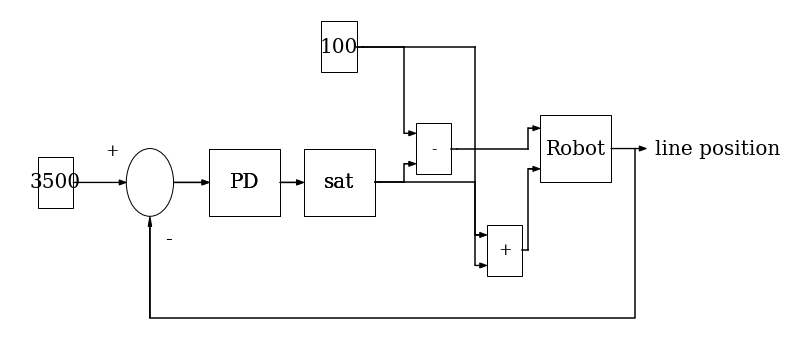

In [72]:
mydraw(block_list)

In [73]:
add1 = pybd.addition_block()

In [74]:
subtract1 = pybd.subtraction_block()

In [75]:
v_nom = pybd.int_constant_block(100,'v_nom_block')

In [76]:
v_nom.place_relative(sat, "right", yshift=4, xshift=-4)

In [77]:
block_list.append(v_nom)

In [78]:
add1.place_relative(sat, "right", yshift=-2, xshift=3)

In [79]:
subtract1.place_relative(sat, "right", yshift=1)

In [80]:
block_list.append(add1)

In [81]:
block_list.append(subtract1)

In [82]:
add1.set_inputs(v_nom, sat)

In [83]:
subtract1.set_inputs(v_nom, sat)

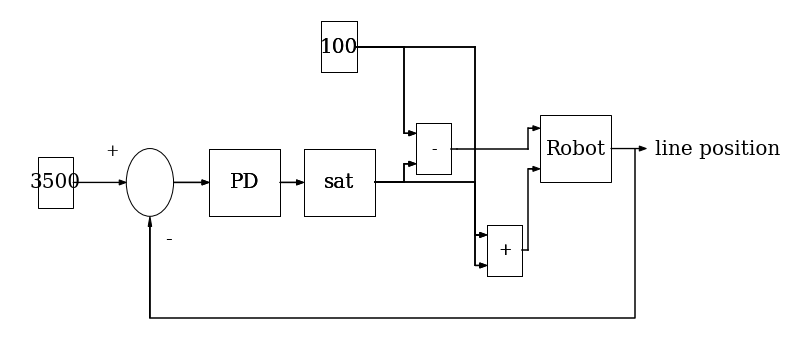

In [84]:
mydraw(block_list)

In [85]:
G.set_inputs(subtract1,add1)

In [86]:
G.place_relative(subtract1,"right",6)

In [87]:
block_list.append(G)

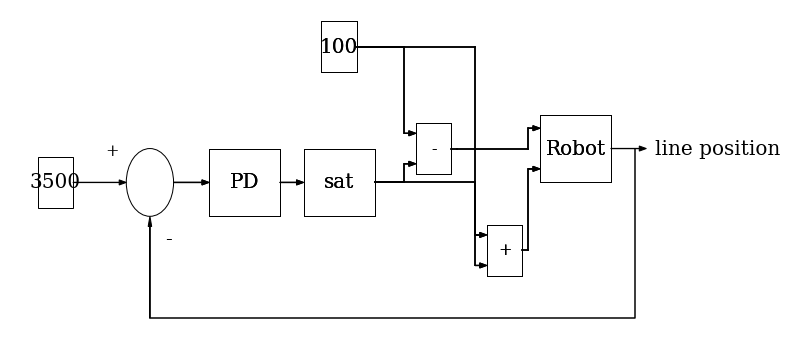

In [88]:
mydraw(block_list)

In [89]:
Y = pybd.output_block("line position",G)

In [90]:
Y.place_relative(G, "right",6)

In [91]:
Y.width = 6

In [92]:
sum1.set_input2(G)

In [93]:
block_list.append(Y)

In [94]:
sum1.fb_vertical_offset = -5

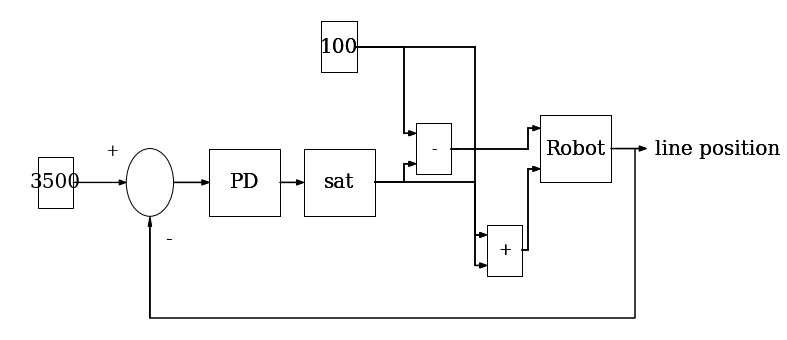

In [95]:
mysys = mydraw(block_list)

## Print Blocks

In [96]:
mysys.print_blocks = [sum1,D,sat,add1,subtract1,G]

## Execution Order

In [97]:
mysys.find_execution_order([U,sum1,D,sat,v_nom,add1,subtract1])

In [98]:
mysys.execution_order

## Codegen Test

In [99]:
msg = "Cart Pendulum Line Follow 1"

In [100]:
mysys.welcome_msg = msg

In [101]:
ls *.ino

cart_pendulum_template1_vib_only.ino  cart_pendulum_template2.ino


In [102]:
template_fn = "cart_pendulum_template2.ino"

In [103]:
mysys.generate_arduino_code("cart_pendulum_autogen_2_line_follow_only", template_fn,\
                           verbosity=1)

block: <py_block_diagram.int_constant_block object at 0x79a78b802080>
block: <py_block_diagram.summing_junction object at 0x79a78b7d27f0>
block: <py_block_diagram.PD_controller object at 0x79a78b7d2e10>
block: <py_block_diagram.saturation_block object at 0x79a78b775a90>
block: <py_block_diagram.int_constant_block object at 0x79a789520ac8>
block: <py_block_diagram.addition_block object at 0x79a7896a88d0>
block: <py_block_diagram.subtraction_block object at 0x79a789520400>
block: <py_block_diagram.plant_with_double_actuator object at 0x79a78b775390>
block: <py_block_diagram.output_block object at 0x79a7895cf588>
block: <py_block_diagram.PD_controller object at 0x79a7894e64e0>
block: <py_block_diagram.saturation_block object at 0x79a7896a8438>
block: <py_block_diagram.int_constant_block object at 0x79a78931f6a0>
block: <py_block_diagram.addition_block object at 0x79a78930f240>
block: <py_block_diagram.subtraction_block object at 0x79a78930f128>
block: <py_block_diagram.plant_with_double_a

In [104]:
add1._get_arduino_param_str()

''